Hola &#x1F600;

Soy **Hesus Garcia**  como "Jesús" pero con H. Sé que puede ser confuso al principio, pero una vez que lo recuerdes, ¡nunca lo olvidarás! &#x1F31D;	. Como revisor de código de Triple-Ten, estoy emocionado de examinar tus proyectos y ayudarte a mejorar tus habilidades en programación. si has cometido algún error, no te preocupes, pues ¡estoy aquí para ayudarte a corregirlo y hacer que tu código brille! &#x1F31F;. Si encuentro algún detalle en tu código, te lo señalaré para que lo corrijas, ya que mi objetivo es ayudarte a prepararte para un ambiente de trabajo real, donde el líder de tu equipo actuaría de la misma manera. Si no puedes solucionar el problema, te proporcionaré más información en la próxima oportunidad. Cuando encuentres un comentario,  **por favor, no los muevas, no los modifiques ni los borres**. 

Revisaré cuidadosamente todas las implementaciones que has realizado para cumplir con los requisitos y te proporcionaré mis comentarios de la siguiente manera:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

</br>

**¡Empecemos!**  &#x1F680;

# Contexto
La empresa Showz la cual se dedica a la venta de entradas de eventos nos contrata para el departamento de analitica.

Tenemos a nuetra disposicion:

-registros del servidor con datos sobre las visitas a Showz desde enero de 2017 hasta diciembre de 2018;

-un archivo con los pedidos en este periodo

-estadísticas de gastos de marketing.

# Objetivo
Optimizar los gastos de marketing investigando:

-cómo los clientes usan el servicio;

-cuándo empiezan a comprar;

-cuánto dinero aporta cada cliente a la compañía;

-cuándo los ingresos cubren el costo de adquisición de los clientes.


In [59]:
import pandas as pd
import numpy as np
import math as mt
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Quería proporcionarte algunos comentarios sobre la organización de los imports en tu códig
    
    
Es preferible agrupar los imports siguiendo el siguiente orden:

Imports de la biblioteca estándar de Python.
Imports de bibliotecas de terceros relacionadas.
Imports específicos de la aplicación local o biblioteca personalizada.
Para mejorar la legibilidad del código, también es recomendable dejar una línea en blanco entre cada grupo de imports, pero solo un import por línea.
Te dejo esta referencia con ejemplos:  
https://pep8.org/#imports

</div>

In [60]:
df_visits = pd.read_csv('/datasets/visits_log_us.csv')
df_orders = pd.read_csv ('/datasets/orders_log_us.csv')
df_cost = pd.read_csv('/datasets/costs_us.csv')



## Tabla visits

In [61]:
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [62]:
 print(df_visits.head())

    Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168  


In [63]:
df_visits.columns = df_visits.columns.str.lower()
df_visits.columns = df_visits.columns.str.replace(' ','_')
print(df_visits)

         device               end_ts  source_id             start_ts  \
0         touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1       desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2         touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3       desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4       desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   
...         ...                  ...        ...                  ...   
359395  desktop  2017-07-29 19:07:19          2  2017-07-29 19:07:00   
359396    touch  2018-01-25 17:38:19          1  2018-01-25 17:38:00   
359397  desktop  2018-03-03 10:12:19          4  2018-03-03 10:12:00   
359398  desktop  2017-11-02 10:12:19          5  2017-11-02 10:12:00   
359399    touch  2017-09-10 13:13:19          2  2017-09-10 13:13:00   

                         uid  
0       16879256277535980062  
1         104060357244891740  
2        7459035603376831527  
3       161

<div class="alert alert-block alert-success">
<b>Comentarios del Revisor</b> <a class="tocSkip"></a><br>
Quiero darte un consejo útil: en lugar de usar la función `print` para mostrar tus DataFrames en Jupyter Notebook, simplemente escribe el nombre del DataFrame en una celda.

En otras palabras, en lugar de hacer esto:

```python
print(mi_dataframe)
```

Puedes hacer esto en una celda por separado:

```python
mi_dataframe
```

Cuando lo haces de esta manera, Jupyter Notebook interpreta y muestra tus DataFrames de una manera más agradable, haciéndolos más fáciles de leer. No es necesario usar `print` en este caso.

Espero que esta sugerencia te ayude a trabajar de manera más eficiente en tus proyectos. ¡Sigue adelante y sigue aprendiendo!
</div>


In [64]:
df_visits['end_ts'] = pd.to_datetime(df_visits['end_ts'])
df_visits['start_ts'] = pd.to_datetime(df_visits['start_ts'])
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  object        
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [65]:
print(df_visits.isna().sum())

device       0
end_ts       0
source_id    0
start_ts     0
uid          0
dtype: int64


In [66]:
print(df_visits.duplicated().sum())
print(df_visits['source_id'].duplicated().sum())
print(df_visits['uid'].duplicated().sum())


0
359391
131231


In [67]:
print(df_visits['source_id'].unique())
print(df_visits['source_id'].value_counts().sort_index())

[ 4  2  5  9  3  1 10  7  6]
1      34121
2      47626
3      85610
4     101794
5      66905
6          6
7         36
9      13277
10     10025
Name: source_id, dtype: int64


-El dataframe df_visits cuenta con 5 columnas y todas son non-null

-Tiene 359400 registros y las 5 columnas cuentan con todos los registros

-Los nombres de las columnas no tienen un formato estandar por lo cual se cambiaran al formato snake case

-El tipo de dato es correcto menos para los campos de fecha en este caso start_ts y end_ts los cuales estan definidos como object y se cambiarion a datetime para un mejor analisis

-La columna source_id cuenta con un codigo correspondiente a la fuente del anuncion por el cual proviene el usuario pero este codigo no contiene la fuente correspondiente  a la fuente 8 puede ser un error que solo sean 9 fuentes y se se cometiera un error o que la fuente de anuncion correspondiente al 8 no trajiera a ningun usuario

-A simple vista algunos registros cuentan con un hora de inicio y fin identicas por lo cual se tiene revisar si es un error de registro o si existe algun problema con el despositivo por el cual ingreso el usuario

-No se cuenta con registros totalmente duplicados, verificar por campos es innecesario ya que son registros de inicio y fin de sesion y un usuario puede ingresar mas de 1 vez en el dia.

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class=“tocSkip”></a> Muy buen manejo del preprocesamiento de los datos en la tabla 'Visits'. </div>

## Tabla orders


In [68]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [69]:
print(df_orders.head())

                Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450


In [70]:
df_orders.columns = df_orders.columns.str.lower()
df_orders.columns = df_orders.columns.str.replace(' ','_')
print(df_orders)

                    buy_ts  revenue                   uid
0      2017-06-01 00:10:00    17.00  10329302124590727494
1      2017-06-01 00:25:00     0.55  11627257723692907447
2      2017-06-01 00:27:00     0.37  17903680561304213844
3      2017-06-01 00:29:00     0.55  16109239769442553005
4      2017-06-01 07:58:00     0.37  14200605875248379450
...                    ...      ...                   ...
50410  2018-05-31 23:50:00     4.64  12296626599487328624
50411  2018-05-31 23:50:00     5.80  11369640365507475976
50412  2018-05-31 23:54:00     0.30   1786462140797698849
50413  2018-05-31 23:56:00     3.67   3993697860786194247
50414  2018-06-01 00:02:00     3.42     83872787173869366

[50415 rows x 3 columns]


In [71]:
df_orders['buy_ts'] = pd.to_datetime(df_orders['buy_ts'])
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [72]:
print(df_orders.isna().sum())

buy_ts     0
revenue    0
uid        0
dtype: int64


In [73]:
print(df_orders.duplicated().sum())

0


-El dataframe cuenta con con 3 columnas todas non-null

-Tiene 50415 y las 3 columnas cuentan con todos lo registros

-Los nombres de las columnas no tienen un formato estandar por lo cual se cambiaran al formato snake case

-El tipo de dato se tiene que cambiar para la columna buy_ts ya que esta como object y para un mejor analisis posterior se cambiara datetime

-No se cuenta con registros totalmente duplicados, verificar por campos es innecesario ya que son registros de compra y un usuario puede hacer mas de una compra

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class=“tocSkip”></a> Excelente trabajo al unificar el formato de las columnas y ajustar los tipos de datos en la tabla 'Orders'. Has seguido un buen enfoque al identificar el momento de las primeras compras. </div>

## Tabla cost

In [74]:
df_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [75]:
print(df_cost.head())

   source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08


In [76]:
df_cost['dt'] = pd.to_datetime(df_cost['dt'])
df_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [77]:
print(df_cost.isna().sum())

source_id    0
dt           0
costs        0
dtype: int64


In [78]:
print(df_cost.duplicated().sum())

0


In [79]:
print(df_cost['source_id'].unique())

[ 1  2  3  4  5  9 10]


-El dataframe cuenta con 3 columnas todas non-null

-Tiene 2542 registros y las 3 columnas cuentan con todos los registros

-Los estan con el formato snake case por lo que un cambio es innecesario

-Como los dataframe anteriores se tiene que cambiar la columna que contiene la fecha ya que esta como tipo object y para un mejor analisis es requerido que este como datetime

-Como el dataframe df_visits este cuente con un identificador de la fuente de anuncio pero en este no se cuente con los gastos de la fuente relacionada a 6,7,8 por lo que pueden no estar los registros completos

## Visitas

### ¿Cuántas personas lo usan cada día, semana y mes? 

In [80]:
print(df_visits.head())

    device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168  


In [81]:

df_visits['visit_week'] = df_visits['start_ts'].dt.isocalendar().week
df_visits['visit_month'] = df_visits['start_ts'].dt.month
df_visits['visit_year'] = df_visits['start_ts'].dt.isocalendar().year
df_visits['visit_date'] = df_visits['start_ts'].dt.date


In [82]:
print(df_visits.head())

    device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid  visit_week  visit_month  visit_year  visit_date  
0  16879256277535980062          51           12        2017  2017-12-20  
1    104060357244891740           8            2        2018  2018-02-19  
2   7459035603376831527          26            7        2017  2017-07-01  
3  16174680259334210214          20            5        2018  2018-05-20  
4   9969694820036681168          52           12        2017  2017-12-27  


In [83]:
dau_total = df_visits.groupby('visit_date').agg({'uid':'nunique'}).mean()
wau_total = df_visits.groupby(['visit_year','visit_week']).agg({'uid':'nunique'}).mean()
mau_total = df_visits.groupby(['visit_year','visit_month']).agg({'uid':'nunique'}).mean()
print(int(dau_total))
print(int(wau_total))
print(int(mau_total))


907
5716
23228


-La actividad de usuarios diaria es de 907 en promedio

-La actividad de usuario semanal es de 5716 en promedio

-La actividad de usuario mensual es de 23228 en promedio

In [134]:
touch_device = df_visits[df_visits['device']=='touch']
desktop_device = df_visits[df_visits['device']=='desktop']
print(touch_device.head())
print(desktop_device.head())

   device              end_ts  source_id            start_ts  \
0   touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
2   touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
7   touch 2017-11-05 15:15:00          3 2017-11-05 15:14:00   
14  touch 2018-04-23 18:01:00          9 2018-04-23 18:00:00   
15  touch 2018-02-12 20:30:00          2 2018-02-12 19:24:00   

                     uid  visit_week  visit_month  visit_year  visit_date  \
0   16879256277535980062          51           12        2017  2017-12-20   
2    7459035603376831527          26            7        2017  2017-07-01   
7   11423865690854540312          44           11        2017  2017-11-05   
14  18026419100367255411          17            4        2018  2018-04-23   
15  18188358787673499603           7            2        2018  2018-02-12   

    session_duration_seg         first_visit  
0                   1080 2017-12-20 17:20:00  
2                      0 2017-07-01 01:54:00  
7          

In [135]:
dau_total_touch = touch_device.groupby('visit_date').agg({'uid':'nunique'}).mean()
wau_total_touch = touch_device.groupby(['visit_year','visit_week']).agg({'uid':'nunique'}).mean()
mau_total_touch = touch_device.groupby(['visit_year','visit_month']).agg({'uid':'nunique'}).mean()
print(int(dau_total_touch))
print(int(wau_total_touch))
print(int(mau_total_touch))


252
1634
6825


In [136]:
dau_total_desktop = desktop_device.groupby('visit_date').agg({'uid':'nunique'}).mean()
wau_total_desktop = desktop_device.groupby(['visit_year','visit_week']).agg({'uid':'nunique'}).mean()
mau_total_desktop = desktop_device.groupby(['visit_year','visit_month']).agg({'uid':'nunique'}).mean()
print(int(dau_total_desktop))
print(int(wau_total_desktop))
print(int(mau_total_desktop))


659
4129
16724


### ¿Cuántas sesiones hay por día? 

In [84]:
#como un usuario puede tener varias sesiones durante el el dia en vez de contar los usuarios unicos con nunique, utilice count
#ya que con esto contara todos segun la fecha indicada
sesions_day = df_visits.groupby('visit_date').agg({'uid':'count'}).mean()
print(int(sesions_day))

987


In [85]:
#sess_per_user = df_visits.groupby(['visit_year','visit_month']).agg({'uid':['count','nunique']})
sess_per_user = df_visits.groupby(['visit_date']).agg({'uid':['count','nunique']})
sess_per_user.columns=['n_session','n_user']
sess_per_user['sspu'] = sess_per_user['n_session'] /sess_per_user['n_user']
print(sess_per_user)

            n_session  n_user      sspu
visit_date                             
2017-06-01        664     605  1.097521
2017-06-02        658     608  1.082237
2017-06-03        477     445  1.071910
2017-06-04        510     476  1.071429
2017-06-05        893     820  1.089024
...               ...     ...       ...
2018-05-27        672     620  1.083871
2018-05-28       1156    1039  1.112608
2018-05-29       1035     948  1.091772
2018-05-30       1410    1289  1.093871
2018-05-31       2256    1997  1.129695

[364 rows x 3 columns]


-La actividad de usuarios diaria no unica es de 987 en promedio

-Hay una sesion diaria por dia 

###  ¿Cuál es la duración de cada sesión?

In [86]:
df_visits['session_duration_seg'] = (df_visits['end_ts'] - df_visits['start_ts']).dt.seconds
print(df_visits['session_duration_seg'].mean())

643.506488592098


<AxesSubplot:>

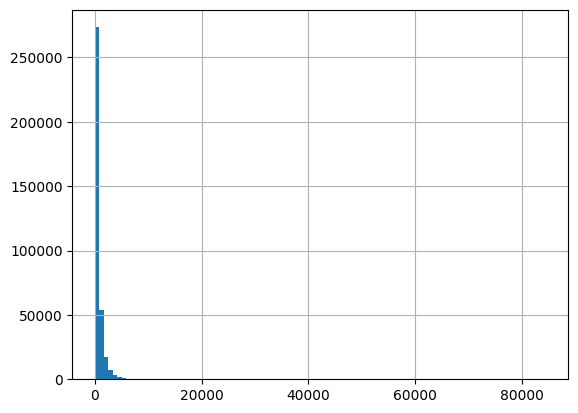

In [87]:
df_visits['session_duration_seg'].hist(bins=100)

In [88]:
print(df_visits['session_duration_seg'].mode())

0    60
dtype: int64


-La duracion promedio de la sesion fue de 643.5 pero como es una distribucion normal es mejor elegir un elemento mas representativo en este caso la moda la cual fue de 60 segundos

-La poca duracion tiene que investigarse y puede deberse a la version que este utilizando el usuario me refiere a touch referente a dispositovos moviles y a desktop equipos de escritorio

### ¿Con qué frecuencia los usuarios regresan? 

In [92]:
sticky_wau = dau_total/wau_total * 100
sticky_mau = dau_total/mau_total * 100

print(sticky_wau)
print(sticky_mau)

uid    15.884409
dtype: float64
uid    3.90897
dtype: float64


-Semanalmente solo un 15.8% de usuarios regresan a al sitio web

-Mensualmente solo un 3.9% de usuarios regresan a al sitio web

-Esto nos indica que puede haber problemas con el sitio web, un diseño poco intuitivo, problemas para pagar, para iniciar sesion o que el diseño para los despositivos moviles(touch) no sea responsive.

## Ventas

### ¿Cuándo empieza la gente a comprar? 

In [93]:
print(df_visits['uid'].nunique())

228169


In [94]:
print(df_orders['uid'].nunique())

36523


In [95]:
first_visit = df_visits.groupby('uid')['start_ts'].min()
first_visit.name='first_visit'
print(first_visit)

uid
11863502262781         2018-03-01 17:27:00
49537067089222         2018-02-06 15:55:00
297729379853735        2017-06-07 18:47:00
313578113262317        2017-09-18 22:49:00
325320750514679        2017-09-30 14:29:00
                               ...        
18446403737806311543   2017-11-30 03:36:00
18446424184725333426   2017-12-06 20:32:00
18446556406699109058   2018-01-01 16:29:00
18446621818809592527   2017-12-27 13:27:00
18446676030785672386   2017-10-04 16:01:00
Name: first_visit, Length: 228169, dtype: datetime64[ns]


In [96]:
df_visits = df_visits.join(first_visit, on='uid')
print(df_visits.head())

    device              end_ts  source_id            start_ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    uid  visit_week  visit_month  visit_year  visit_date  \
0  16879256277535980062          51           12        2017  2017-12-20   
1    104060357244891740           8            2        2018  2018-02-19   
2   7459035603376831527          26            7        2017  2017-07-01   
3  16174680259334210214          20            5        2018  2018-05-20   
4   9969694820036681168          52           12        2017  2017-12-27   

   session_duration_seg         first_visit  
0                  1080 2017-12-20 17:20:00  
1                  1680 2018-02-19 16:53:00  
2             

In [97]:
first_order = df_orders.groupby('uid')['buy_ts'].min()
first_order.name='first_order'
print(first_order.head())

uid
313578113262317    2018-01-03 21:51:00
1575281904278712   2017-06-03 10:13:00
2429014661409475   2017-10-11 18:33:00
2464366381792757   2018-01-28 15:54:00
2551852515556206   2017-11-24 10:14:00
Name: first_order, dtype: datetime64[ns]


In [98]:
df_orders = df_orders.join(first_order,on='uid')
print(df_orders.head())

               buy_ts  revenue                   uid         first_order
0 2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00
1 2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00
2 2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00
3 2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00
4 2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00


In [99]:
df_con = df_visits.merge(df_orders,on='uid')

print(df_con.head())

    device              end_ts  source_id            start_ts  \
0  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
1  desktop 2018-03-09 20:33:00          4 2018-03-09 20:05:00   
2  desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
3  desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
4  desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   

                    uid  visit_week  visit_month  visit_year  visit_date  \
0  16174680259334210214          20            5        2018  2018-05-20   
1  16174680259334210214          10            3        2018  2018-03-09   
2  16007536194108375387          35            9        2017  2017-09-03   
3  16007536194108375387          35            9        2017  2017-09-03   
4  16007536194108375387          35            9        2017  2017-09-03   

   session_duration_seg         first_visit              buy_ts  revenue  \
0                  1440 2018-03-09 20:05:00 2018-03-09 20:25:00     2.33   


In [100]:
df_con['first_visit_d'] = df_con['first_visit'].dt.date
df_con['first_order_d'] = df_con['first_order'].dt.date
print(df_con)

         device              end_ts  source_id            start_ts  \
0       desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
1       desktop 2018-03-09 20:33:00          4 2018-03-09 20:05:00   
2       desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
3       desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
4       desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
...         ...                 ...        ...                 ...   
761802  desktop 2017-12-04 12:50:00          3 2017-12-04 12:42:00   
761803  desktop 2017-11-20 23:44:00          4 2017-11-20 23:33:00   
761804    touch 2017-11-29 20:48:00          4 2017-11-29 20:27:00   
761805  desktop 2018-04-23 21:19:00         10 2018-04-23 21:11:00   
761806  desktop 2017-07-31 12:31:00          3 2017-07-31 12:13:00   

                         uid  visit_week  visit_month  visit_year  visit_date  \
0       16174680259334210214          20            5        2018  2018-05-20 

In [101]:
df_con['convertion_d'] = df_con['first_order_d'] - df_con['first_visit_d']

print(df_con)

         device              end_ts  source_id            start_ts  \
0       desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
1       desktop 2018-03-09 20:33:00          4 2018-03-09 20:05:00   
2       desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
3       desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
4       desktop 2017-09-03 21:36:00          5 2017-09-03 21:35:00   
...         ...                 ...        ...                 ...   
761802  desktop 2017-12-04 12:50:00          3 2017-12-04 12:42:00   
761803  desktop 2017-11-20 23:44:00          4 2017-11-20 23:33:00   
761804    touch 2017-11-29 20:48:00          4 2017-11-29 20:27:00   
761805  desktop 2018-04-23 21:19:00         10 2018-04-23 21:11:00   
761806  desktop 2017-07-31 12:31:00          3 2017-07-31 12:13:00   

                         uid  visit_week  visit_month  visit_year  visit_date  \
0       16174680259334210214          20            5        2018  2018-05-20 

In [102]:
conver = df_con.groupby(['source_id','convertion_d']).agg(n_users=('uid','nunique'),n_con=('convertion_d','count')).reset_index()
print(conver)

      source_id convertion_d  n_users  n_con
0             1       0 days     3794  71880
1             1       1 days      619   8998
2             1       2 days      214  20190
3             1       3 days      126   1701
4             1       4 days      106  70154
...         ...          ...      ...    ...
2043         10     344 days        1      2
2044         10     348 days        1      1
2045         10     349 days        1      1
2046         10     353 days        1      1
2047         10     357 days        2      5

[2048 rows x 4 columns]


In [103]:
conver['convertion_d'].describe()

count                          2048
mean       155 days 17:34:41.250000
std      96 days 15:55:26.135340312
min                 0 days 00:00:00
25%                73 days 00:00:00
50%               150 days 00:00:00
75%               231 days 00:00:00
max               363 days 00:00:00
Name: convertion_d, dtype: object

In [104]:
conver_so = df_con.groupby(['source_id']).agg({'convertion_d':'count'}).reset_index()
print(conver_so)

   source_id  convertion_d
0          1        248662
1          2        238297
2          3         46766
3          4         62683
4          5        151824
5          7             1
6          9          9547
7         10          4027


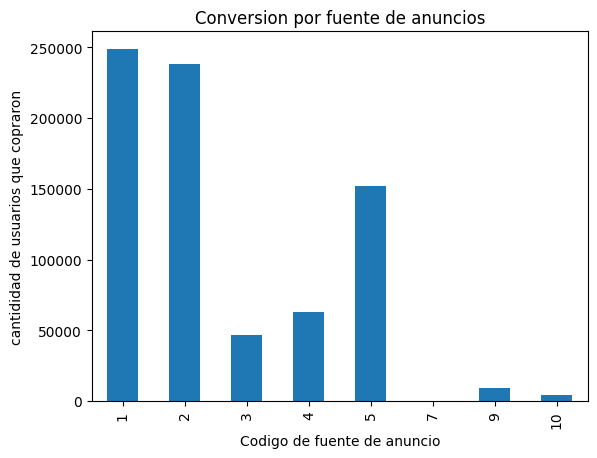

In [105]:
conver_so.plot(kind='bar',x='source_id',y='convertion_d',legend=False)
plt.title('Conversion por fuente de anuncios')
plt.xlabel('Codigo de fuente de anuncio')
plt.ylabel('cantididad de usuarios que copraron')
plt.show()

-La conversion de los usuarios en dias va desde los 0 a los 363 es decir que hay personas que comprar algo el mismo dia y 
como maximo se han demorado 363 dias en comprar algo

-Las fuentes de anuncio con mas conversion es la 1 y la mas baja la 7 hay que verificar las fuentes que estan dando poco 
rendimiento en el caso de que este mal promocionado los servicios o productos del sitio o que estos medios esten ya obsoletos.

### ¿Cuántos pedidos hacen durante un período de tiempo dado? 

In [106]:
#al no contar con id de pedido para verificar cuantos se hacen conte la cantidad de usuarios en un tiempo especifico en este
#caso en un mes
df_orders['first_order_m'] = df_orders['first_order'].astype('datetime64[M]')
df_orders['order_m'] = df_orders['buy_ts'].astype('datetime64[M]')


cohort_pedidos = df_orders.groupby('first_order_m').agg({'uid':'count'}).reset_index()

print(cohort_pedidos)

   first_order_m   uid
0     2017-06-01  4438
1     2017-07-01  2910
2     2017-08-01  2188
3     2017-09-01  3878
4     2017-10-01  6005
5     2017-11-01  5900
6     2017-12-01  5894
7     2018-01-01  4308
8     2018-02-01  4470
9     2018-03-01  4484
10    2018-04-01  2690
11    2018-05-01  3249
12    2018-06-01     1


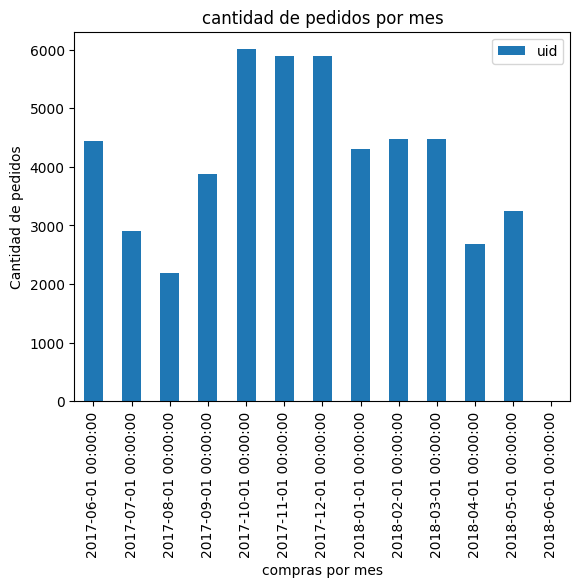

In [107]:
cohort_pedidos.plot(kind='bar',x='first_order_m',y='uid')
plt.title('cantidad de pedidos por mes')
plt.xlabel('compras por mes')
plt.ylabel('Cantidad de pedidos')
plt.show()

-La cantidad de pedidos a partir de Junio del 2017 que es el primero mes de registros tendio a bajar hasta Septiembre siendo en Octubre un alza y tubo un pequeña disminucion para Nombiembre y Diciembre del mismo año 

-En Enero empezo con un monto parecido en pedidos a los del 2018 y para los meses de Febrero y Marzo tubo un pequeño crecimiento en pedidos Abril tubo casi la mitad de ventas que Abril y en Mayo se recupero un poco el mes de Junio para año 2018 no se presentan muchos registros por lo que no se puede cocluir algo por el momento

-Hay que verificar por que Octubre, Noviembre y Diciembre fueron los meses con mas ventas puede ser debido a algunas celebracion o debido a que gran parte de las personas toman vacaciones

### ¿Cuál es el tamaño promedio de compra?

In [108]:
print(df_orders)


                   buy_ts  revenue                   uid         first_order  \
0     2017-06-01 00:10:00    17.00  10329302124590727494 2017-06-01 00:10:00   
1     2017-06-01 00:25:00     0.55  11627257723692907447 2017-06-01 00:25:00   
2     2017-06-01 00:27:00     0.37  17903680561304213844 2017-06-01 00:27:00   
3     2017-06-01 00:29:00     0.55  16109239769442553005 2017-06-01 00:29:00   
4     2017-06-01 07:58:00     0.37  14200605875248379450 2017-06-01 07:58:00   
...                   ...      ...                   ...                 ...   
50410 2018-05-31 23:50:00     4.64  12296626599487328624 2018-05-31 23:50:00   
50411 2018-05-31 23:50:00     5.80  11369640365507475976 2018-05-31 23:50:00   
50412 2018-05-31 23:54:00     0.30   1786462140797698849 2018-05-31 23:54:00   
50413 2018-05-31 23:56:00     3.67   3993697860786194247 2018-05-31 23:56:00   
50414 2018-06-01 00:02:00     3.42     83872787173869366 2018-06-01 00:02:00   

      first_order_m    order_m  
0     

In [109]:
cohort_promedio = df_orders.groupby(['first_order_m','order_m']).agg({'revenue':'sum','uid':'nunique'}).reset_index()

print(cohort_promedio)

   first_order_m    order_m   revenue   uid
0     2017-06-01 2017-06-01   9557.49  2023
1     2017-06-01 2017-07-01    981.82    61
2     2017-06-01 2017-08-01    885.34    50
3     2017-06-01 2017-09-01   1931.30    54
4     2017-06-01 2017-10-01   2068.58    88
..           ...        ...       ...   ...
74    2018-03-01 2018-05-01   1114.87    58
75    2018-04-01 2018-04-01  10600.69  2276
76    2018-04-01 2018-05-01   1209.92    69
77    2018-05-01 2018-05-01  13925.76  2988
78    2018-06-01 2018-06-01      3.42     1

[79 rows x 4 columns]


In [110]:
cohort_promedio['reve_per_user'] = cohort_promedio['revenue']/cohort_promedio['uid']
cohort_promedio['cohort_life'] = cohort_promedio['order_m'] - cohort_promedio['first_order_m']
cohort_promedio['cohort_life'] = cohort_promedio['cohort_life'] /np.timedelta64(1, 'M')
cohort_promedio['cohort_life'] = cohort_promedio['cohort_life'].round().astype('int') 
print(cohort_promedio)

   first_order_m    order_m   revenue   uid  reve_per_user  cohort_life
0     2017-06-01 2017-06-01   9557.49  2023       4.724414            0
1     2017-06-01 2017-07-01    981.82    61      16.095410            1
2     2017-06-01 2017-08-01    885.34    50      17.706800            2
3     2017-06-01 2017-09-01   1931.30    54      35.764815            3
4     2017-06-01 2017-10-01   2068.58    88      23.506591            4
..           ...        ...       ...   ...            ...          ...
74    2018-03-01 2018-05-01   1114.87    58      19.221897            2
75    2018-04-01 2018-04-01  10600.69  2276       4.657597            0
76    2018-04-01 2018-05-01   1209.92    69      17.535072            1
77    2018-05-01 2018-05-01  13925.76  2988       4.660562            0
78    2018-06-01 2018-06-01      3.42     1       3.420000            0

[79 rows x 6 columns]


In [111]:
mean = cohort_promedio.pivot_table(index='first_order_m',columns='cohort_life',values='reve_per_user',aggfunc='mean')
print(mean)

cohort_life          0          1          2           3          4   \
first_order_m                                                          
2017-06-01     4.724414  16.095410  17.706800   35.764815  23.506591   
2017-07-01     6.010218  12.396346  21.035965   10.786094   6.938163   
2017-08-01     5.276518  11.148793  11.851321   12.182955  16.921250   
2017-09-01     5.644529  22.188385  13.445200  138.669189  19.881538   
2017-10-01     5.003733  11.287427   6.753252    7.413152   7.072796   
2017-11-01     5.154683   7.339054   6.786583   12.510660   7.457284   
2017-12-01     4.738191   7.816575  39.366019   48.135052  27.431400   
2018-01-01     4.135636   8.721228  12.365542   11.199767   4.699556   
2018-02-01     4.156987   8.610000   4.942414    6.941026        NaN   
2018-03-01     4.838803  11.811667  19.221897         NaN        NaN   
2018-04-01     4.657597  17.535072        NaN         NaN        NaN   
2018-05-01     4.660562        NaN        NaN         NaN       

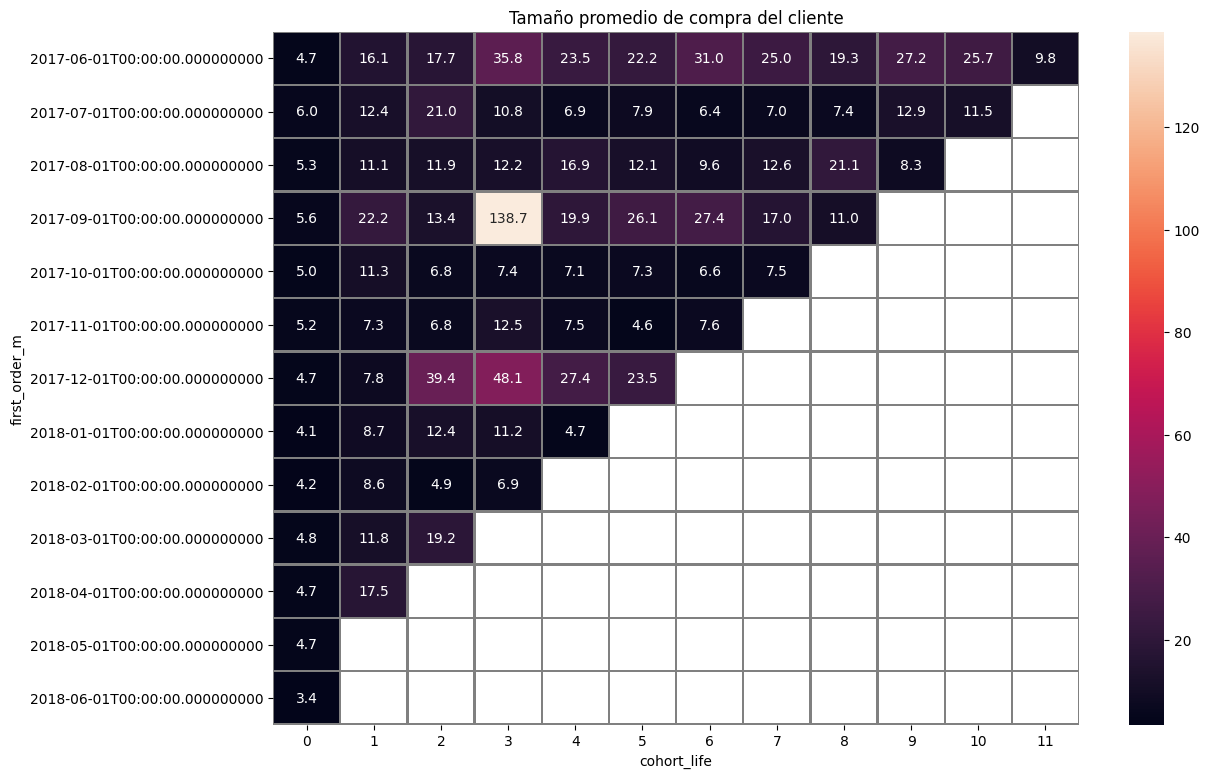

In [112]:
plt.figure(figsize=(13, 9))
plt.title('Tamaño promedio de compra del cliente')
sns.heatmap(
    mean,
    annot=True,
    fmt='.1f',
    linewidths=1,
    linecolor='gray'
)
plt.show()

-El ingreso en general en todos los cohortos crecio como se puede ver a medida que avanzo el ciclo de vida de este

-Se tiene que investigar el promedio de venta para el mes de noviembre el cual es mayor a todos los demas

###  ¿Cuánto dinero traen? (LTV) 

In [113]:
print(df_orders.groupby('uid')['revenue'].sum())
print(df_orders['revenue'].sum())

uid
313578113262317          0.55
1575281904278712         3.05
2429014661409475        73.33
2464366381792757         2.44
2551852515556206        10.99
                        ...  
18445147675727495770     3.05
18445407535914413204     0.88
18445601152732270159     4.22
18446156210226471712     9.78
18446167067214817906     7.94
Name: revenue, Length: 36523, dtype: float64
252057.19999999998


In [114]:
size = df_orders.groupby('first_order_m').agg({'uid':'nunique'}).reset_index()
print(size)

   first_order_m   uid
0     2017-06-01  2023
1     2017-07-01  1923
2     2017-08-01  1370
3     2017-09-01  2581
4     2017-10-01  4340
5     2017-11-01  4081
6     2017-12-01  4383
7     2018-01-01  3373
8     2018-02-01  3651
9     2018-03-01  3533
10    2018-04-01  2276
11    2018-05-01  2988
12    2018-06-01     1


In [115]:
size.columns = ['first_order_m','n_usr']
print(size)

   first_order_m  n_usr
0     2017-06-01   2023
1     2017-07-01   1923
2     2017-08-01   1370
3     2017-09-01   2581
4     2017-10-01   4340
5     2017-11-01   4081
6     2017-12-01   4383
7     2018-01-01   3373
8     2018-02-01   3651
9     2018-03-01   3533
10    2018-04-01   2276
11    2018-05-01   2988
12    2018-06-01      1


In [118]:
cohort_order_ltv = df_orders.groupby(['first_order_m','order_m']).agg({'revenue':'sum'}).reset_index()
print(cohort_order_ltv)

   first_order_m    order_m   revenue
0     2017-06-01 2017-06-01   9557.49
1     2017-06-01 2017-07-01    981.82
2     2017-06-01 2017-08-01    885.34
3     2017-06-01 2017-09-01   1931.30
4     2017-06-01 2017-10-01   2068.58
..           ...        ...       ...
74    2018-03-01 2018-05-01   1114.87
75    2018-04-01 2018-04-01  10600.69
76    2018-04-01 2018-05-01   1209.92
77    2018-05-01 2018-05-01  13925.76
78    2018-06-01 2018-06-01      3.42

[79 rows x 3 columns]


In [119]:
report = pd.merge(size,cohort_order_ltv,on='first_order_m')
print(report)

   first_order_m  n_usr    order_m   revenue
0     2017-06-01   2023 2017-06-01   9557.49
1     2017-06-01   2023 2017-07-01    981.82
2     2017-06-01   2023 2017-08-01    885.34
3     2017-06-01   2023 2017-09-01   1931.30
4     2017-06-01   2023 2017-10-01   2068.58
..           ...    ...        ...       ...
74    2018-03-01   3533 2018-05-01   1114.87
75    2018-04-01   2276 2018-04-01  10600.69
76    2018-04-01   2276 2018-05-01   1209.92
77    2018-05-01   2988 2018-05-01  13925.76
78    2018-06-01      1 2018-06-01      3.42

[79 rows x 4 columns]


In [120]:
margin = 0.5

report['gp'] = report['revenue'] * margin
report['age'] = (report['order_m'] - report['first_order_m'])/np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
print(report)

   first_order_m  n_usr    order_m   revenue        gp  age
0     2017-06-01   2023 2017-06-01   9557.49  4778.745    0
1     2017-06-01   2023 2017-07-01    981.82   490.910    1
2     2017-06-01   2023 2017-08-01    885.34   442.670    2
3     2017-06-01   2023 2017-09-01   1931.30   965.650    3
4     2017-06-01   2023 2017-10-01   2068.58  1034.290    4
..           ...    ...        ...       ...       ...  ...
74    2018-03-01   3533 2018-05-01   1114.87   557.435    2
75    2018-04-01   2276 2018-04-01  10600.69  5300.345    0
76    2018-04-01   2276 2018-05-01   1209.92   604.960    1
77    2018-05-01   2988 2018-05-01  13925.76  6962.880    0
78    2018-06-01      1 2018-06-01      3.42     1.710    0

[79 rows x 6 columns]


In [121]:
report['ltv'] = report['gp']/report['n_usr']
print(report)
ltv=report.pivot_table(index='first_order_m',columns='age',values='ltv',aggfunc='mean')
print(ltv)

   first_order_m  n_usr    order_m   revenue        gp  age       ltv
0     2017-06-01   2023 2017-06-01   9557.49  4778.745    0  2.362207
1     2017-06-01   2023 2017-07-01    981.82   490.910    1  0.242664
2     2017-06-01   2023 2017-08-01    885.34   442.670    2  0.218819
3     2017-06-01   2023 2017-09-01   1931.30   965.650    3  0.477336
4     2017-06-01   2023 2017-10-01   2068.58  1034.290    4  0.511265
..           ...    ...        ...       ...       ...  ...       ...
74    2018-03-01   3533 2018-05-01   1114.87   557.435    2  0.157780
75    2018-04-01   2276 2018-04-01  10600.69  5300.345    0  2.328798
76    2018-04-01   2276 2018-05-01   1209.92   604.960    1  0.265800
77    2018-05-01   2988 2018-05-01  13925.76  6962.880    0  2.330281
78    2018-06-01      1 2018-06-01      3.42     1.710    0  1.710000

[79 rows x 7 columns]
age                  0         1         2         3         4         5   \
first_order_m                                               

In [122]:
ltv20170601 = ltv.loc['2017-06-01'].sum()
print(ltv20170601)

5.939616905585761


In [123]:
ppp=report.groupby('first_order_m')['revenue'].sum()
print(ppp)

first_order_m
2017-06-01    24031.69
2017-07-01    16127.92
2017-08-01    11606.26
2017-09-01    34676.32
2017-10-01    27603.45
2017-11-01    26098.99
2017-12-01    33485.74
2018-01-01    16663.13
2018-02-01    16750.50
2018-03-01    19273.41
2018-04-01    11810.61
2018-05-01    13925.76
2018-06-01        3.42
Name: revenue, dtype: float64


-Como se puede apreciar cada usuario a lo largo del ciclo de vida del cohorto trae menos ganancias esto quiere decir que compran menos.

-Se cuenta con algunas alzas para los meses ultimos 4 meses de año 2017

-El ltv o lo que aportan los usuarios para el mes de junio fue de 5.939616905585761

## Marketing

### ¿Cuánto dinero se gastó? (Total/por fuente de adquisición/a lo largo del tiempo) 

In [124]:

df_cost['month'] = df_cost['dt'].astype('datetime64[M]')
print(df_cost)

      source_id         dt  costs      month
0             1 2017-06-01  75.20 2017-06-01
1             1 2017-06-02  62.25 2017-06-01
2             1 2017-06-03  36.53 2017-06-01
3             1 2017-06-04  55.00 2017-06-01
4             1 2017-06-05  57.08 2017-06-01
...         ...        ...    ...        ...
2537         10 2018-05-27   9.92 2018-05-01
2538         10 2018-05-28  21.26 2018-05-01
2539         10 2018-05-29  11.32 2018-05-01
2540         10 2018-05-30  33.15 2018-05-01
2541         10 2018-05-31  17.60 2018-05-01

[2542 rows x 4 columns]


In [125]:
cost_m = df_cost.groupby('month')['costs'].sum().reset_index()
print(cost_m)
print(cost_m['costs'].sum())


        month     costs
0  2017-06-01  18015.00
1  2017-07-01  18240.59
2  2017-08-01  14790.54
3  2017-09-01  24368.91
4  2017-10-01  36322.88
5  2017-11-01  37907.88
6  2017-12-01  38315.35
7  2018-01-01  33518.52
8  2018-02-01  32723.03
9  2018-03-01  30415.27
10 2018-04-01  22289.38
11 2018-05-01  22224.27
329131.61999999994


In [126]:
report_cac = pd.merge(report,cost_m, left_on='first_order_m',right_on='month')
report_cac['cac']=report_cac['costs'] / report_cac['n_usr']

print(report_cac)

   first_order_m  n_usr    order_m   revenue        gp  age       ltv  \
0     2017-06-01   2023 2017-06-01   9557.49  4778.745    0  2.362207   
1     2017-06-01   2023 2017-07-01    981.82   490.910    1  0.242664   
2     2017-06-01   2023 2017-08-01    885.34   442.670    2  0.218819   
3     2017-06-01   2023 2017-09-01   1931.30   965.650    3  0.477336   
4     2017-06-01   2023 2017-10-01   2068.58  1034.290    4  0.511265   
..           ...    ...        ...       ...       ...  ...       ...   
73    2018-03-01   3533 2018-04-01   1063.05   531.525    1  0.150446   
74    2018-03-01   3533 2018-05-01   1114.87   557.435    2  0.157780   
75    2018-04-01   2276 2018-04-01  10600.69  5300.345    0  2.328798   
76    2018-04-01   2276 2018-05-01   1209.92   604.960    1  0.265800   
77    2018-05-01   2988 2018-05-01  13925.76  6962.880    0  2.330281   

        month     costs       cac  
0  2017-06-01  18015.00  8.905091  
1  2017-06-01  18015.00  8.905091  
2  2017-06-01  

In [127]:
report_cac['cac'].describe()

count    78.000000
mean      9.319905
std       0.733719
min       7.437841
25%       8.905091
50%       9.288870
75%       9.485486
max      10.796015
Name: cac, dtype: float64

-En promedio se necesita  9.319905 para atraer a un cliente 

-por lo que se puede ver el cac es mayor al ltv por lo que no se esta recuperando la inversion 

### ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes? 

In [128]:
source = df_cost[['month','source_id']]
print(source)

          month  source_id
0    2017-06-01          1
1    2017-06-01          1
2    2017-06-01          1
3    2017-06-01          1
4    2017-06-01          1
...         ...        ...
2537 2018-05-01         10
2538 2018-05-01         10
2539 2018-05-01         10
2540 2018-05-01         10
2541 2018-05-01         10

[2542 rows x 2 columns]


In [129]:
report_cost_s = pd.merge(report_cac,source,left_on='first_order_m',right_on='month')
print(report_cost_s.head())

  first_order_m  n_usr    order_m  revenue        gp  age       ltv  \
0    2017-06-01   2023 2017-06-01  9557.49  4778.745    0  2.362207   
1    2017-06-01   2023 2017-06-01  9557.49  4778.745    0  2.362207   
2    2017-06-01   2023 2017-06-01  9557.49  4778.745    0  2.362207   
3    2017-06-01   2023 2017-06-01  9557.49  4778.745    0  2.362207   
4    2017-06-01   2023 2017-06-01  9557.49  4778.745    0  2.362207   

     month_x    costs       cac    month_y  source_id  
0 2017-06-01  18015.0  8.905091 2017-06-01          1  
1 2017-06-01  18015.0  8.905091 2017-06-01          1  
2 2017-06-01  18015.0  8.905091 2017-06-01          1  
3 2017-06-01  18015.0  8.905091 2017-06-01          1  
4 2017-06-01  18015.0  8.905091 2017-06-01          1  


In [130]:
report_cost_final_source = report_cost_s.groupby(['source_id'])['cac'].sum()
print(report_cost_final_source)

source_id
1     22106.119918
2     22106.119918
3     22106.119918
4     22106.119918
5     22131.946641
9     22106.119918
10    22106.119918
Name: cac, dtype: float64


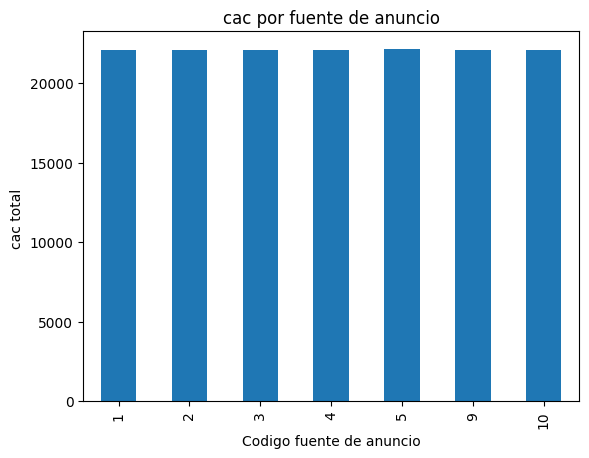

In [131]:
report_cost_final_source.plot(kind='bar')
plt.title('cac por fuente de anuncio')
plt.xlabel('Codigo fuente de anuncio')
plt.ylabel('cac total ')
plt.show()

-por cada fuente de anuncios se gasta 22106 generalmente

-la fuente de anuncio 5 fue la genero mas gastos

<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class=“tocSkip”></a> Tu análisis del costo por fuente de adquisición es muy sólido</div>

### ¿Cuán rentables eran las inversiones? (ROMI)

In [132]:
report_cac['romi'] = report_cac['ltv']/report_cac['cac']
print(report_cac )

   first_order_m  n_usr    order_m   revenue        gp  age       ltv  \
0     2017-06-01   2023 2017-06-01   9557.49  4778.745    0  2.362207   
1     2017-06-01   2023 2017-07-01    981.82   490.910    1  0.242664   
2     2017-06-01   2023 2017-08-01    885.34   442.670    2  0.218819   
3     2017-06-01   2023 2017-09-01   1931.30   965.650    3  0.477336   
4     2017-06-01   2023 2017-10-01   2068.58  1034.290    4  0.511265   
..           ...    ...        ...       ...       ...  ...       ...   
73    2018-03-01   3533 2018-04-01   1063.05   531.525    1  0.150446   
74    2018-03-01   3533 2018-05-01   1114.87   557.435    2  0.157780   
75    2018-04-01   2276 2018-04-01  10600.69  5300.345    0  2.328798   
76    2018-04-01   2276 2018-05-01   1209.92   604.960    1  0.265800   
77    2018-05-01   2988 2018-05-01  13925.76  6962.880    0  2.330281   

        month     costs       cac      romi  
0  2017-06-01  18015.00  8.905091  0.265265  
1  2017-06-01  18015.00  8.9050

In [133]:
rromi=report_cac.pivot_table(index='first_order_m',columns='age',values='romi',aggfunc='mean')
print(rromi.cumsum(axis=1).round(2))


age              0     1     2     3     4     5     6     7     8     9   \
first_order_m                                                               
2017-06-01     0.27  0.29  0.32  0.37  0.43  0.47  0.52  0.56  0.59  0.62   
2017-07-01     0.32  0.33  0.37  0.39  0.40  0.40  0.41  0.42  0.43  0.43   
2017-08-01     0.24  0.27  0.29  0.31  0.33  0.34  0.35  0.37  0.38  0.39   
2017-09-01     0.30  0.36  0.39  0.60  0.62  0.65  0.69  0.70  0.71   NaN   
2017-10-01     0.30  0.33  0.34  0.35  0.36  0.37  0.37  0.38   NaN   NaN   
2017-11-01     0.28  0.30  0.31  0.33  0.34  0.34  0.34   NaN   NaN   NaN   
2017-12-01     0.27  0.29  0.34  0.40  0.42  0.44   NaN   NaN   NaN   NaN   
2018-01-01     0.21  0.22  0.24  0.25  0.25   NaN   NaN   NaN   NaN   NaN   
2018-02-01     0.23  0.25  0.25  0.26   NaN   NaN   NaN   NaN   NaN   NaN   
2018-03-01     0.28  0.30  0.32   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2018-04-01     0.24  0.26   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

-Como se puede apreciar no se llega a recuperar la inversion en cohorto existe un aumento en el ciclo de vida pero no contempla 
una recuperacion como tal 

## Conclusion

-De la manera como esta haciendo las cosas Showz no esta obteniendo ganancias ya que se puede ver en el romi al separarse en cohortes en en ninguno logra una recuperacion de la inversion

-Se le recomienda definir bien los canales de anuncios ya que las fuentes de anuncios que que estaba relacionado con la llegada del usuario no estaba completa y tampoco eran las mismas por lo cual se estaba evaluando el costo es decir en los costos se tenia menos fuentes de anuncios de la registradas por el usuario lo que proboca incoherencia en el analisis

-Teniendo en cuenta que el gasto para cada fuente de anuncio es el mismo se le recomiendo invertir mas en los primero 2 ya que fueron los que mas atrajeron visitantes.

-Tambien con respecto a la actividad de usuario por dispositivo fue mayor en los deskptop por lo que sugiere invertir en mejorar en los dispositivos touch que ya que estos pueden ir de un smartphone a una table algo que las personas en general tienen a mano.



<div class="alert alert-block alert-success"> <b>Comentario del revisor</b> <a class=“tocSkip”></a> La conclusión es clara y bien fundamentada. Tus recomendaciones son acertadas y proporcionan una guía clara para mejorar la estrategia de marketing de Showz. </div>








## Comentario Final

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Impresionante esfuerzo en este proyecto! 🌟 **Este proyecto está listo para ser aprobado.**<br>
Tu habilidad para ejecutar y presentar este trabajo es admirable.<br>
<br>Es un placer reconocer tu dedicación y el análisis detallado que has llevado a cabo. Continúa superándote en tus futuras iniciativas. Confío en que aplicarás este conocimiento de manera efectiva en desafíos futuros, avanzando hacia objetivos aún más ambiciosos.
</div>
